In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# Problem 1

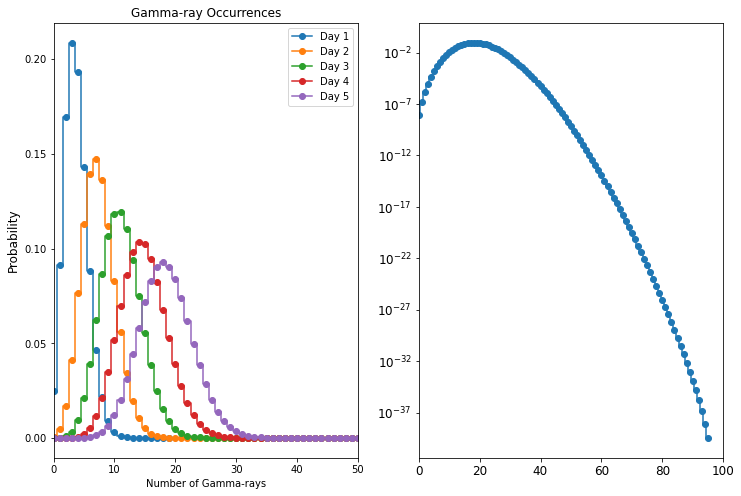

In [2]:
X = 3.7
Y = 7.2

# X = average cosmic-ray background
# Y = average number of gamma-rays emitted by hypothetical source

k = np.arange(0,20,1)
day_1 = stats.poisson.pmf(k, X, loc = 0)

fig, ax = plt.subplots(1, 2, figsize=(12,8))

plt.tick_params(labelsize = 12)
ax[0].set_xlim([0,50])
ax[0].set_ylabel('Probability', fontsize = 12)
ax[0].set_xlabel('Number of Gamma-rays')
ax[0].set_title("Gamma-ray Occurrences")

ax[0].step(k, day_1, 'o-',where = 'mid')

day_2 = np.convolve(day_1, day_1)
k2 = np.arange(0, len(day_2), 1)
ax[0].step(k2, day_2, 'o-', where = 'mid')

day_3 = np.convolve(day_1, day_2)
k3 = np.arange(0, len(day_3), 1)
ax[0].step(k3, day_3, 'o-', where = 'mid')

day_4 = np.convolve(day_1, day_3)
k4 = np.arange(0, len(day_4), 1)
ax[0].step(k4, day_4, 'o-', where = 'mid')
        
day_5 = np.convolve(day_1, day_4)
k5 = np.arange(0, len(day_5), 1)
ax[0].step(k5, day_5, 'o-', where = 'mid')

ax[0].legend(["Day 1", 'Day 2', "Day 3", 'Day 4', "Day 5"])

ax[1].set_yscale("log")
ax[1].set_xlim([0,100])
ax[1].step(k5, day_5, 'o-', where = 'mid')

Not Gaussian, looks not parabolic on log plot.

#### Averaging

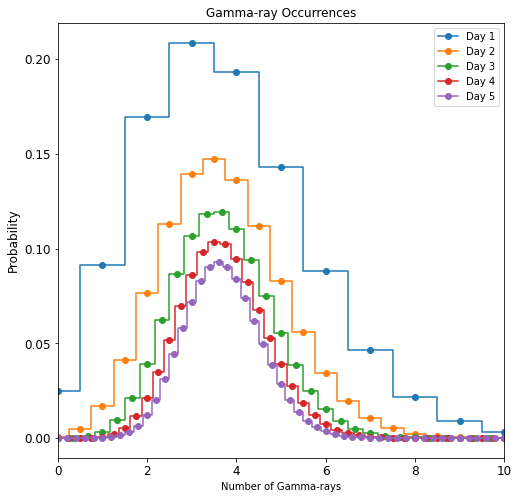

In [3]:
X = 3.7
Y = 7.2

# X = average cosmic-ray background
# Y = average number of gamma-rays emitted by hypothetical source

# Part A ---

k = np.arange(0,20,1)
day_1 = stats.poisson.pmf(k, X, loc = 0)

fig, ax = plt.subplots(1, 1, figsize=(8,8))

plt.tick_params(labelsize = 12)
ax.set_xlim([0,10])
ax.set_ylabel('Probability', fontsize = 12)
ax.set_xlabel('Number of Gamma-rays')
ax.set_title("Gamma-ray Occurrences")

ax.step(k, day_1, 'o-',where = 'mid')

day_2 = np.convolve(day_1, day_1)
k2 = np.arange(0, len(day_2), 1)
ax.step(k2 / 2, day_2, 'o-', where = 'mid')

day_3 = np.convolve(day_1, day_2)
k3 = np.arange(0, len(day_3), 1)
ax.step(k3  / 3, day_3, 'o-', where = 'mid')

day_4 = np.convolve(day_1, day_3)
k4 = np.arange(0, len(day_4), 1)
ax.step(k4  / 4, day_4, 'o-', where = 'mid')
        
day_5 = np.convolve(day_1, day_4)
k5 = np.arange(0, len(day_5), 1)
ax.step(k5  / 5, day_5, 'o-', where = 'mid')

ax.legend(["Day 1", 'Day 2', "Day 3", 'Day 4', "Day 5"])

#### Finding Sigma
To find sigma after N days, you convolve N of the original background distributions (Poissons with mean X), then integrate (or sum because the distribution is discrete) the resulting convolution from an x-value (number of gamma rays seen) of Y*N to infinity. This integral gives the probability, which you use as normal in a ppf function.

The sigma for a Y of 7.2 is -11.048895250189949.


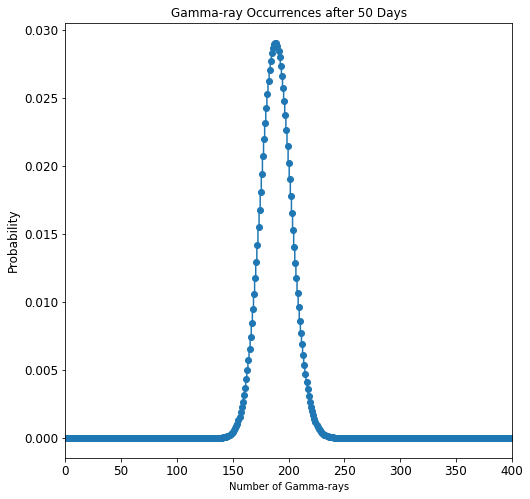

In [4]:
X = 3.7
Y = 7.2
N = 50

k = np.arange(0,20,1)
original = stats.poisson.pmf(k, X, loc = 0)
final = original

for i in range(N):
    final = np.convolve(final, original)

k = np.arange(0, len(final), 1)

fig, ax = plt.subplots(1, 1, figsize=(8,8))

plt.tick_params(labelsize = 12)
ax.set_xlim([0,400])
ax.set_ylabel('Probability', fontsize = 12)
ax.set_xlabel('Number of Gamma-rays')
ax.set_title("Gamma-ray Occurrences after " + str(N) + " Days")

ax.step(k, final, 'o-',where = 'mid')

prob = 0
for i in range(len(k) - int(Y*N)):
    prob = prob + final[int(Y*N) + i]
# Could use np.sum() here, gives exact same answer
    
print('The sigma for a Y of ' + str(Y) + ' is ' + str(stats.norm.ppf(prob, loc = 0, scale = 1)) + '.')

# Problem 2

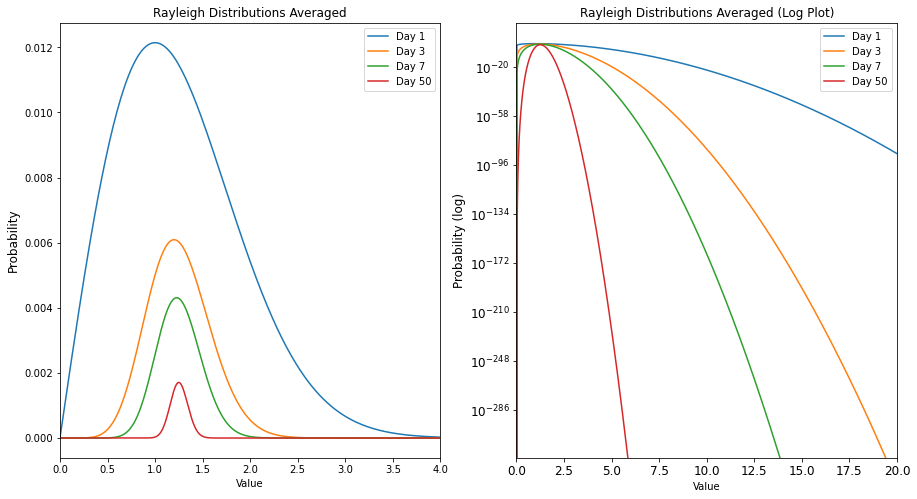

In [5]:
N1 = 3
N2 = 7
N3 = 50

k = np.linspace(0, 20, 1000)
original = stats.rayleigh.pdf(k, loc = 0, scale = 1)
final_1 = original
final_2 = original
final_3 = original

for i in range(N1):
    final_1 = np.convolve(final_1, original)
final_1 = final_1 / np.sum(final_1)

# Using len(k1) spaces here gives an inherent average of the distribution
k1 = np.linspace(0, 20, len(final_1))

for i in range(N2):
    final_2 = np.convolve(final_2, original)
final_2 = final_2 / np.sum(final_2)
k2 = np.linspace(0, 20, len(final_2))

for i in range(N3):
    final_3 = np.convolve(final_3, original)
final_3 = final_3 / np.sum(final_3)
k3 = np.linspace(0, 20, len(final_3))

fig, ax = plt.subplots(1, 2, figsize=(15,8))

plt.tick_params(labelsize = 12)
ax[0].set_title("Rayleigh Distributions Averaged")
ax[0].set_ylabel('Probability', fontsize = 12)
ax[0].set_xlabel('Value')
ax[1].set_title("Rayleigh Distributions Averaged (Log Plot)")
ax[1].set_ylabel('Probability (log)', fontsize = 12)
ax[1].set_xlabel('Value')

ax[0].plot(k, original / np.sum(original))
ax[0].plot(k1, final_1)
ax[0].plot(k2, final_2)
ax[0].plot(k3, final_3)
ax[0].set_xlim([0,4])

ax[1].semilogy(k, original / np.sum(original))
ax[1].semilogy(k1, final_1)
ax[1].semilogy(k2, final_2)
ax[1].semilogy(k3, final_3)
ax[1].set_xlim([0,20])

ax[0].legend(["Day 1","Day " + str(N1), "Day " + str(N2), "Day " + str(N3)])
ax[1].legend(["Day 1","Day " + str(N1), "Day " + str(N2), "Day " + str(N3)])

As you can see above, the more distributions that are averaged, the closer the resulting distribution becomes to a Gaussian. Using the log plot you can tell that after 7 days it's still not very close to a Gaussian (very antisymmetric curve, fast fall off on the left-hand side). After 50 averages it looks much closer to a Gaussian, but still is a little bit off- you can see the left-hand side is steeper than the right. That said, the y-axis also covers 300 or so orders of magnitude on the log plot, so in the area where probabilities are actually meaningful (first 20 or so orders of magnitude) it is much closer to a Gaussian.

# Problem 3
#### Version 1

The probability of getting 8.2 photons is 7.05199791178732e-07. The associated sigma is -4.823529411764706.
This is not statistically significant.


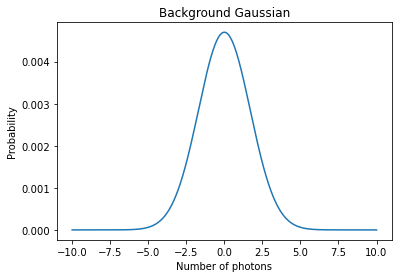

In [6]:
# X is chosen background Gaussian width
# Y is chosen signal strength
X = 1.7
Y = 8.2

k = np.linspace(-10, 10, 1000)
background = stats.norm.pdf(k, loc = 0, scale = X)
background = background / np.sum(background)

fig, ax = plt.subplots(1, 1)
ax.set_title("Background Gaussian")
ax.set_xlabel("Number of photons")
ax.set_ylabel("Probability")

prob = stats.norm.sf(Y, loc = 0, scale = X)
sigma = stats.norm.ppf(prob, loc = 0, scale = 1)

ax.plot(k, background)

print("The probability of getting " + str(Y) + " photons is " + str(prob) + ". The associated sigma is " + str(sigma) + ".")
print("This is not statistically significant.")

#### Version 2
Statistical Question: 

The probability of getting 8.2 photons is 0.006862703778224901. The associated sigma is -2.464370699065314.
This is not statistically significant.


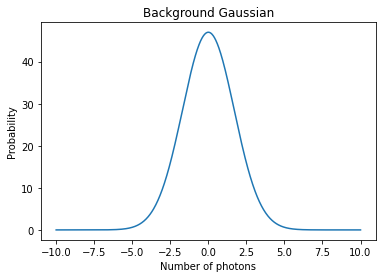

In [7]:
# X is chosen background Gaussian width
# Y is chosen signal strength
X = 1.7
Y = 8.2
num_pixels = 10000

k = np.linspace(-10, 10, 1000)
background = stats.norm.pdf(k, loc = 0, scale = X)
background = background / np.sum(background)
full_run = background * num_pixels


fig, ax = plt.subplots(1, 1)
ax.set_title("Background Gaussian")
ax.set_xlabel("Number of photons")
ax.set_ylabel("Probability")

ax.plot(k, full_run)

index = 0

for i in range(len(k)):
    if(k[i] >= Y):
        index = i
        break

prob = np.sum(full_run[index:len(k)])

sigma = stats.norm.ppf(prob, loc = 0, scale = 1)

print("The probability of getting " + str(Y) + " photons is " + str(prob) + ". The associated sigma is " + str(sigma) + ".")
print("This is not statistically significant.")

# Problem 4

In [8]:
prob5sigma = 1/3.5e6
num_pixels = 10000
X = 1.7
# Version 1-

det = stats.norm.ppf(1 - prob5sigma, loc = 0, scale = X)

print("The required value for 5 sigma in version 1 is " + str(round(det, 2)) + ".")

# Version 2
det_2= stats.norm.ppf(1 - prob5sigma / num_pixels, loc = 0, scale = X)
print("The required value for 5 sigma in version 2 is " + str(round(det_2, 1)) + ".")

The required value for 5 sigma in version 1 is 8.5.
The required value for 5 sigma in version 2 is 11.1.


Using the cdf function with a given value returns the probability of getting that value. Thus, to get the version 1 required signal, we took the probability associated with 5 sigma (1 - 1/3.5e6), and used the inverse of the cdf function- the ppf function. This gave the signal value required to get a 5 sigma significance.
<br>
For version 2, the probability associated with 5 sigma is different because the distribution is scaled by the number of pixels (10,000). So in the ppf function we must now divide the probability of 5 sigma by the number of pixels.
<br>
The difference in brightness ends up being pretty small compared to the number of pixels (difference in brightness of 3 compared to 10,000 pixels). This makes sense because the distributions don't get any wider, they just get scaled vertically, so while the actual readings climb in volume massively, the rare readings are still very rare compared to the width of the distribution. If you continue to change the trials factor by more orders of magnitude, the 5-sigma sensitivity threshold will change, but likely only on the order of one order of magnitude (unless you introduce *many* more trials).
